In [1]:
import numpy as np
import matplotlib.pyplot as plt
from models.value import Value
from functions.trace_graph import draw_dot

In [2]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0, grad=0.0)

### Derivatives
A function of a real variable $f(x)$ is differentiable at a point $a$ of its domain, if its domain contains an open interval containing ⁠ $a$⁠, and the limit:
$$
L = \lim_{h \rightarrow 0} \frac{f(a + h) - f(a)}{h}
$$
exists, it is called the derivative of $f$ at point $a$.

#### 1. Derivative of $L$ in regards to $L$
In the following, we have:
$$
L = d \times f
$$

We calculate the derivative of $L$ in regards of $L$, we will have the following:
$$
\frac{\delta{L}}{\delta{L}} = \lim_{h \rightarrow 0} \frac{L(d,f) + h - L(d, f)}{h} = \lim_{h \rightarrow 0} \frac{d.f + h - d.f}{h} = \lim_{h \rightarrow 0} \frac{h}{h} = 1
$$

#### 2. Derivative of $L$ in regards to $d$
We calculate the derivative of $L$ in regards of $d$, we will have the following:
$$
\frac{\delta{L}}{\delta{d}} = \lim_{h \rightarrow 0} \frac{L(d + h,f) - L(d, f)}{h} = \lim_{h \rightarrow 0} \frac{(d + h).f - d.f}{h} = \lim_{h \rightarrow 0} \frac{d.f + h.f - d.f}{h} = \lim_{h \rightarrow 0} \frac{h.f}{h} = f
$$

#### 3. Derivative of $L$ in regards to $f$
We calculate the derivative of $L$ in regards of $f$, we will have the following:
$$
\frac{\delta{L}}{\delta{d}} = \lim_{h \rightarrow 0} \frac{L(d,f + h) - L(d, f)}{h} = \lim_{h \rightarrow 0} \frac{d.(f + h) - d.f}{h} = \lim_{h \rightarrow 0} \frac{d.f + d.h - d.f}{h} = \lim_{h \rightarrow 0} \frac{d.f}{h} = d
$$

In [3]:
# L = d * f

# dL/dL = 1
L.grad = 1.0

# dL/dd = f = -2.0
d.grad = -2.0

# dL/df = d = 4.0
f.grad = 4.0

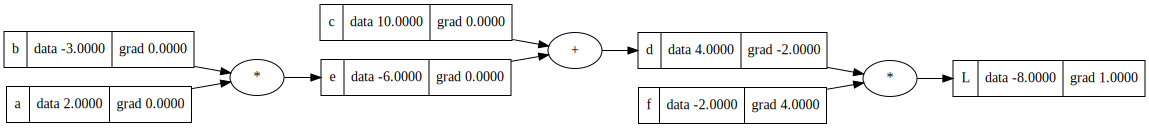

In [4]:
draw_dot(L)

### Chain Rule
If a variable $z$ depends on the variable $y$, which itself depends on the variable $x$ (that is, $y$ and $z$ are dependent variables), then $z$ depends on $x$ as well, via the intermediate variable $y$. In this case, the chain rule is expressed as:
$$
\frac{\delta{z}}{\delta{x}} = \frac{\delta{z}}{\delta{y}} . \frac{\delta{y}}{\delta{x}}
$$

**Derivative of $L$ with respect to $c$ and with respect to $e$**

Using the graph below and the chain rule we know that $L$ depends on $d$ and $d$ depends on $c$, so using the chain rule, we get:
$$
\frac{\delta{L}}{\delta{c}} = \frac{\delta{L}}{\delta{d}} . \frac{\delta{d}}{\delta{c}}
$$

We have $d = e + c$, so:
$$
\frac{\delta{d}}{\delta{c}} = \lim_{h \rightarrow 0} \frac{d(e, c + h) - d(e, c)}{h} = \lim_{h \rightarrow 0} \frac{e + c + h - e + c}{h} = \lim_{h \rightarrow 0} \frac{h}{h} = 1
$$

and $\frac{\delta{L}}{\delta{d}} = f = -2$:
$$
\frac{\delta{L}}{\delta{c}} = \frac{\delta{L}}{\delta{d}} . \frac{\delta{d}}{\delta{c}} = -2 . 1 = -2
$$

Same as the derivative of $L$ with respect to $c$, we get:
$$
\frac{\delta{L}}{\delta{c}} = \frac{\delta{L}}{\delta{d}} . \frac{\delta{d}}{\delta{e}} = -2 . 1 = -2
$$

**Derivative of $L$ with respect to $a$ and with respect to $b$**

Using the same logic, we have $e = a * b$ and we know that $L$ is dependent on $e$ and $e$ is dependent on $a$, so $L$ is dependent on $a$ via the intermediate of the variable $e$, so:
$$
\frac{\delta{L}}{\delta{a}} = \frac{\delta{L}}{\delta{e}} . \frac{\delta{e}}{\delta{a}}
$$

And:
$$
\frac{\delta{L}}{\delta{b}} = \frac{\delta{L}}{\delta{e}} . \frac{\delta{e}}{\delta{b}}
$$

We know that $e = a * b$, so:
$$
\frac{\delta{e}}{\delta{a}} = \lim_{h \rightarrow 0} \frac{e(a + h, b) - e(a, b)}{h} = \lim_{h \rightarrow 0} \frac{(a + h) * b - a * b}{h} = \lim_{h \rightarrow 0} \frac{a * b + h * b - a * b}{h} = \lim_{h \rightarrow 0} \frac{h * b}{h} = b = -3
$$

Same thing:

$$
\frac{\delta{e}}{\delta{a}} = \lim_{h \rightarrow 0} \frac{e(a, b + h) - e(a, b)}{h} = \lim_{h \rightarrow 0} \frac{a * (b + h) - a * b}{h} = \lim_{h \rightarrow 0} \frac{a * b + a * h - a * b}{h} = \lim_{h \rightarrow 0} \frac{a * h}{h} = a = 2
$$

So:
$$
\frac{\delta{L}}{\delta{a}} = -2 . -3 = 6
$$
$$
\frac{\delta{L}}{\delta{b}} = -2 . 2 = -4
$$

In [5]:
e.grad = -2.0
c.grad = -2.0
a.grad = 6.0
b.grad = -4.0

### Gradient descent
The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a trajectory that maximizes that function; the procedure is then known as gradient ascent.

In the example below, we increment the leaf nodes which are: a, b, c and f with theirs gradient with respect to L multiplied by a certain value called the learning rate.

In [6]:
learning_rate = 0.01

a.data += learning_rate * a.grad
b.data += learning_rate * b.grad
c.data += learning_rate * c.grad
f.data += learning_rate * f.grad

# forward pass
e = a * b
d = e + c
L = d * f

print(L.data) # old value is -8.0

-7.286496


The value of L decreased from -8.0 to -7.28 because of the small values added to the variables a, b, c and f.

In [2]:
# inputs: x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights: w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
b = Value(6.8813735870195432, label='b')


x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

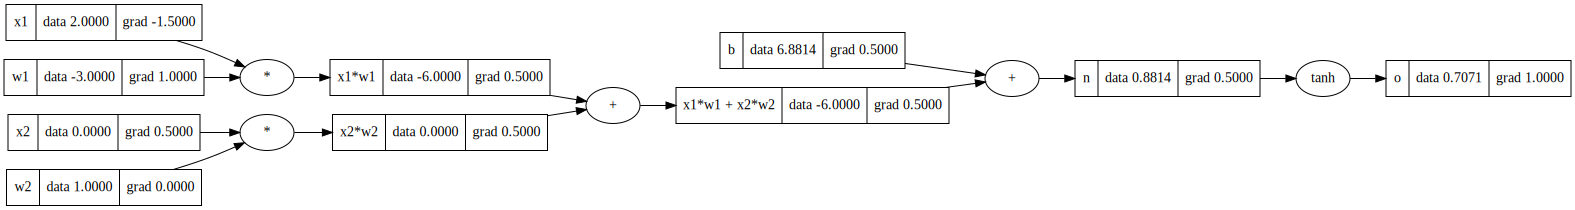

In [5]:
draw_dot(o)

In [4]:
o.backward()